<a href="https://colab.research.google.com/github/yeedas/COVID19Tweet/blob/master/Covid19_Tweet_Classifcation_BERT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive/


In [ ]:
project_path = "/content/drive/My Drive/DLCP/NLP/covid tweet/"
GLOVE_PATH = "/content/drive/My Drive/Fake News Challenge/"
BERT_path = "/content/drive/My Drive/DLCP/NLP/"

In [ ]:
from zipfile import ZipFile
with ZipFile(GLOVE_PATH+'glove.6B.zip', 'r') as z:
  z.extractall()

Unzip BERT 

In [ ]:
from zipfile import ZipFile
with ZipFile(BERT_path+'uncased_L-4_H-256_A-4.zip', 'r') as z:
  z.extractall(project_path)
!ls


bert_config.json		     bert_model.ckpt.index  sample_data
bert_model.ckpt.data-00000-of-00001  drive		    vocab.txt


In [ ]:
import os
import pandas as pd
#Load train bodies
train_path = os.path.join(project_path,'train.tsv')
print(train_path)
train = pd.read_csv(train_path,sep='\t')

#test_path = os.path.join(project_path,'valid.tsv')
#print(train_text.head)
#df1 = train_text["Text"]
#print(df1)
texts = []
labels = []
#print("shape", df1.shape)
#[count, n_cols] = df1.shape

#print("count",count)

/content/drive/My Drive/DLCP/NLP/covid tweet/train.tsv


In [ ]:
#Load train bodies
val_path = os.path.join(project_path,'valid.tsv')
print(val_path)
test = pd.read_csv(val_path,sep='\t')
#print(val_text.head)
#print(train_text.head)
test.columns = ['Id','Text','Label']

/content/drive/My Drive/DLCP/NLP/covid tweet/valid.tsv


In [ ]:
lab = df1['Label']
print(lab.shape)
for i in range (0,count):
  if (lab[i] == 'INFORMATIVE'):
    labels.append(1)
  elif (lab[i] == 'UNINFORMATIVE'):
    labels.append(0)
print("labels shape ",len(labels))
#df1['Labelnew'] = labels

(6936,)
labels shape  55488


ValueError: ignored

In [ ]:

DATA_COLUMN = 'Text'
LABEL_COLUMN = 'Label'
# label_list is the list of labels, i.e. True, False or 0, 1 or 'dog', 'cat'
label_list = ['UNINFORMATIVE', 'INFORMATIVE']

In [ ]:
print(train.columns)

Index(['Id', 'Text', 'Label'], dtype='object')


This BERT package bert-classifier which requires tensorflow.contrib which is not there in current tensorflow version 2.0 so we need to select tensorflow 1.x which can be done by this command

In [ ]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


BERT Implementation

In [ ]:
from sklearn.model_selection import train_test_split
import pandas as pd
import tensorflow as tf
import tensorflow_hub as hub
from datetime import datetime


Installing BERT tensor flow 1.0.1 to resolve the error of Trying to access flag --preserve_unused_tokens before flags were parsed.

In [ ]:
!pip install bert-tensorflow==1.0.1

     |████████████████████████████████| 71kB 2.0MB/s 


In [ ]:
!pip install bert-tensorflow

     |████████████████████████████████| 71kB 2.1MB/s 


In [ ]:
!pip list

Package                       Version        
----------------------------- ---------------
absl-py                       0.9.0          
alabaster                     0.7.12         
albumentations                0.1.12         
altair                        4.1.0          
argon2-cffi                   20.1.0         
asgiref                       3.2.10         
astor                         0.8.1          
astropy                       4.0.1.post1    
astunparse                    1.6.3          
atari-py                      0.2.6          
atomicwrites                  1.4.0          
attrs                         19.3.0         
audioread                     2.1.8          
autograd                      1.3            
Babel                         2.8.0          
backcall                      0.2.0          
beautifulsoup4                4.6.3          
bert-tensorflow               1.0.4          
bleach                        3.1.5          
blis                          0.4.

In [ ]:
import bert
from bert import run_classifier
from bert import optimization
from bert import tokenization

In [ ]:
OUTPUT_DIR = "/content/drive/My Drive/DLCP/NLP/"#@param {type:"string"}
print('***** Model output directory: {} *****'.format(OUTPUT_DIR))

***** Model output directory: /content/drive/My Drive/DLCP/NLP/ *****


BERT

In [ ]:
# Use the InputExample class from BERT's run_classifier code to create examples from the data
train_InputExamples = train.apply(lambda x: bert.run_classifier.InputExample(guid=None, # Globally unique ID for bookkeeping, unused in this example
                                                                   text_a = x[DATA_COLUMN], 
                                                                   text_b = None, 
                                                                   label = x[LABEL_COLUMN]), axis = 1)

test_InputExamples = test.apply(lambda x: bert.run_classifier.InputExample(guid=None, 
                                                                   text_a = x[DATA_COLUMN], 
                                                                   text_b = None, 
                                                                   label = x[LABEL_COLUMN]), axis = 1)

In [ ]:
import keras
#from tokenization import FullTokenizer

BERT_local = "./"

# `word piece tokenizer` need to a prepared vocabulary.
vocab_path = os.path.join(BERT_local, 'vocab.txt')

# load vocab to tokenizer
tokenizer = tokenization.FullTokenizer(vocab_path, do_lower_case=True)


Using TensorFlow backend.


In [ ]:
BERT_MODEL_HUB = "https://tfhub.dev/google/small_bert/bert_uncased_L-4_H-256_A-4/1"

In [ ]:
# This is a path to an uncased (all lowercase) version of BERT
#BERT_MODEL_HUB = "https://tfhub.dev/google/bert_uncased_L-12_H-768_A-12/1"
#BERT_MODEL_HUB ="/content/drive/My Drive/DLCP/NLP/uncased_L-2_H-256_A-4.zip"

def create_tokenizer_from_hub_module():
  """Get the vocab file and casing info from the Hub module."""
  with tf.Graph().as_default():
    bert_module = hub.Module(BERT_MODEL_HUB)
    tokenization_info = bert_module(signature="tokenization_info", as_dict=True)
    with tf.Session() as sess:
      vocab_file, do_lower_case = sess.run([tokenization_info["vocab_file"],
                                            tokenization_info["do_lower_case"]])
      
  return bert.tokenization.FullTokenizer(
      vocab_file=vocab_file, do_lower_case=do_lower_case)

tokenizer = create_tokenizer_from_hub_module()

INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


In [ ]:
tokenizer.tokenize("This here's an example of using the BERT tokenizer")

['this',
 'here',
 "'",
 's',
 'an',
 'example',
 'of',
 'using',
 'the',
 'bert',
 'token',
 '##izer']

In [ ]:

# We'll set sequences to be at most 128 tokens long.
MAX_SEQ_LENGTH = 128
# Convert our train and test features to InputFeatures that BERT understands.
train_features = bert.run_classifier.convert_examples_to_features(train_InputExamples, label_list, MAX_SEQ_LENGTH, tokenizer)
test_features = bert.run_classifier.convert_examples_to_features(test_InputExamples, label_list, MAX_SEQ_LENGTH, tokenizer)

INFO:tensorflow:Writing example 0 of 6936


INFO:tensorflow:Writing example 0 of 6936


INFO:tensorflow:*** Example ***


INFO:tensorflow:*** Example ***


INFO:tensorflow:guid: None


INFO:tensorflow:guid: None


INFO:tensorflow:tokens: [CLS] official death toll from # co ##vid ##19 in the united kingdom is now greater than : germany + poland + switzerland + austria + portugal + greece + sweden + finland + norway + ireland . . . combined . uk : 67 . 5 million ( 233 dead ) above group : 185 million ( 230 dead ) http ##ur ##l [SEP]


INFO:tensorflow:tokens: [CLS] official death toll from # co ##vid ##19 in the united kingdom is now greater than : germany + poland + switzerland + austria + portugal + greece + sweden + finland + norway + ireland . . . combined . uk : 67 . 5 million ( 233 dead ) above group : 185 million ( 230 dead ) http ##ur ##l [SEP]


INFO:tensorflow:input_ids: 101 2880 2331 9565 2013 1001 2522 17258 16147 1999 1996 2142 2983 2003 2085 3618 2084 1024 2762 1009 3735 1009 5288 1009 5118 1009 5978 1009 5483 1009 4701 1009 6435 1009 5120 1009 3163 1012 1012 1012 4117 1012 2866 1024 6163 1012 1019 2454 1006 22115 2757 1007 2682 2177 1024 15376 2454 1006 11816 2757 1007 8299 3126 2140 102 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_ids: 101 2880 2331 9565 2013 1001 2522 17258 16147 1999 1996 2142 2983 2003 2085 3618 2084 1024 2762 1009 3735 1009 5288 1009 5118 1009 5978 1009 5483 1009 4701 1009 6435 1009 5120 1009 3163 1012 1012 1012 4117 1012 2866 1024 6163 1012 1019 2454 1006 22115 2757 1007 2682 2177 1024 15376 2454 1006 11816 2757 1007 8299 3126 2140 102 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:label: INFORMATIVE (id = 1)


INFO:tensorflow:label: INFORMATIVE (id = 1)


INFO:tensorflow:*** Example ***


INFO:tensorflow:*** Example ***


INFO:tensorflow:guid: None


INFO:tensorflow:guid: None


INFO:tensorflow:tokens: [CLS] dear ##est mr . president @ user 1 , 169 corona ##virus deaths in the us in 24 hours ( ? ) co ##vid ##19 pan ##de ##mic is an international crime from china - not a nature di ##sas ##ster ! please use your authorities to protect your people and world against china ! # china ##has ##to ##com ##pen ##sat ##eal ##l [SEP]


INFO:tensorflow:tokens: [CLS] dear ##est mr . president @ user 1 , 169 corona ##virus deaths in the us in 24 hours ( ? ) co ##vid ##19 pan ##de ##mic is an international crime from china - not a nature di ##sas ##ster ! please use your authorities to protect your people and world against china ! # china ##has ##to ##com ##pen ##sat ##eal ##l [SEP]


INFO:tensorflow:input_ids: 101 6203 4355 2720 1012 2343 1030 5310 1015 1010 18582 21887 23350 6677 1999 1996 2149 1999 2484 2847 1006 1029 1007 2522 17258 16147 6090 3207 7712 2003 2019 2248 4126 2013 2859 1011 2025 1037 3267 4487 20939 6238 999 3531 2224 2115 4614 2000 4047 2115 2111 1998 2088 2114 2859 999 1001 2859 14949 3406 9006 11837 16846 15879 2140 102 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_ids: 101 6203 4355 2720 1012 2343 1030 5310 1015 1010 18582 21887 23350 6677 1999 1996 2149 1999 2484 2847 1006 1029 1007 2522 17258 16147 6090 3207 7712 2003 2019 2248 4126 2013 2859 1011 2025 1037 3267 4487 20939 6238 999 3531 2224 2115 4614 2000 4047 2115 2111 1998 2088 2114 2859 999 1001 2859 14949 3406 9006 11837 16846 15879 2140 102 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:label: INFORMATIVE (id = 1)


INFO:tensorflow:label: INFORMATIVE (id = 1)


INFO:tensorflow:*** Example ***


INFO:tensorflow:*** Example ***


INFO:tensorflow:guid: None


INFO:tensorflow:guid: None


INFO:tensorflow:tokens: [CLS] latest updates march 20 [UNK] new cases and 38 new deaths in the united states illinois : govern ##o pri ##tz ##ker issues " stay at home " order for all residents new york : governor cu ##omo orders 100 % of all non - essential workers to stay home penn ##s . . . source ( / corona ##virus / country / us / ) [SEP]


INFO:tensorflow:tokens: [CLS] latest updates march 20 [UNK] new cases and 38 new deaths in the united states illinois : govern ##o pri ##tz ##ker issues " stay at home " order for all residents new york : governor cu ##omo orders 100 % of all non - essential workers to stay home penn ##s . . . source ( / corona ##virus / country / us / ) [SEP]


INFO:tensorflow:input_ids: 101 6745 14409 2233 2322 100 2047 3572 1998 4229 2047 6677 1999 1996 2142 2163 4307 1024 21208 2080 26927 5753 5484 3314 1000 2994 2012 2188 1000 2344 2005 2035 3901 2047 2259 1024 3099 12731 19506 4449 2531 1003 1997 2035 2512 1011 6827 3667 2000 2994 2188 9502 2015 1012 1012 1012 3120 1006 1013 21887 23350 1013 2406 1013 2149 1013 1007 102 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_ids: 101 6745 14409 2233 2322 100 2047 3572 1998 4229 2047 6677 1999 1996 2142 2163 4307 1024 21208 2080 26927 5753 5484 3314 1000 2994 2012 2188 1000 2344 2005 2035 3901 2047 2259 1024 3099 12731 19506 4449 2531 1003 1997 2035 2512 1011 6827 3667 2000 2994 2188 9502 2015 1012 1012 1012 3120 1006 1013 21887 23350 1013 2406 1013 2149 1013 1007 102 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:label: INFORMATIVE (id = 1)


INFO:tensorflow:label: INFORMATIVE (id = 1)


INFO:tensorflow:*** Example ***


INFO:tensorflow:*** Example ***


INFO:tensorflow:guid: None


INFO:tensorflow:guid: None


INFO:tensorflow:tokens: [CLS] 真 [UNK] 公 主 不 [UNK] [UNK] 部 breaking : 21 people on grand princess cruise ship docked off the california coast tested positive for corona ##virus , including 19 crew members and two passengers , vice pre ##s . mike pen ##ce says . 24 people tested negative . http ##ur ##l http ##ur ##l [SEP]


INFO:tensorflow:tokens: [CLS] 真 [UNK] 公 主 不 [UNK] [UNK] 部 breaking : 21 people on grand princess cruise ship docked off the california coast tested positive for corona ##virus , including 19 crew members and two passengers , vice pre ##s . mike pen ##ce says . 24 people tested negative . http ##ur ##l http ##ur ##l [SEP]


INFO:tensorflow:input_ids: 101 1921 100 1772 1747 1744 100 100 1960 4911 1024 2538 2111 2006 2882 4615 8592 2911 25727 2125 1996 2662 3023 7718 3893 2005 21887 23350 1010 2164 2539 3626 2372 1998 2048 5467 1010 3580 3653 2015 1012 3505 7279 3401 2758 1012 2484 2111 7718 4997 1012 8299 3126 2140 8299 3126 2140 102 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_ids: 101 1921 100 1772 1747 1744 100 100 1960 4911 1024 2538 2111 2006 2882 4615 8592 2911 25727 2125 1996 2662 3023 7718 3893 2005 21887 23350 1010 2164 2539 3626 2372 1998 2048 5467 1010 3580 3653 2015 1012 3505 7279 3401 2758 1012 2484 2111 7718 4997 1012 8299 3126 2140 8299 3126 2140 102 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:label: INFORMATIVE (id = 1)


INFO:tensorflow:label: INFORMATIVE (id = 1)


INFO:tensorflow:*** Example ***


INFO:tensorflow:*** Example ***


INFO:tensorflow:guid: None


INFO:tensorflow:guid: None


INFO:tensorflow:tokens: [CLS] oklahoma city — the state department of education announced monday the closure of all k - 12 public schools statewide until at least april 6 as the number of co ##vid - 19 cases climb and the risk of community spread grows . http ##ur ##l [SEP]


INFO:tensorflow:tokens: [CLS] oklahoma city — the state department of education announced monday the closure of all k - 12 public schools statewide until at least april 6 as the number of co ##vid - 19 cases climb and the risk of community spread grows . http ##ur ##l [SEP]


INFO:tensorflow:input_ids: 101 5858 2103 1517 1996 2110 2533 1997 2495 2623 6928 1996 8503 1997 2035 1047 1011 2260 2270 2816 13486 2127 2012 2560 2258 1020 2004 1996 2193 1997 2522 17258 1011 2539 3572 7105 1998 1996 3891 1997 2451 3659 7502 1012 8299 3126 2140 102 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_ids: 101 5858 2103 1517 1996 2110 2533 1997 2495 2623 6928 1996 8503 1997 2035 1047 1011 2260 2270 2816 13486 2127 2012 2560 2258 1020 2004 1996 2193 1997 2522 17258 1011 2539 3572 7105 1998 1996 3891 1997 2451 3659 7502 1012 8299 3126 2140 102 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:label: UNINFORMATIVE (id = 0)


INFO:tensorflow:label: UNINFORMATIVE (id = 0)


INFO:tensorflow:Writing example 0 of 999


INFO:tensorflow:Writing example 0 of 999


INFO:tensorflow:*** Example ***


INFO:tensorflow:*** Example ***


INFO:tensorflow:guid: None


INFO:tensorflow:guid: None


INFO:tensorflow:tokens: [CLS] second case dr [UNK] the canadian woman has not been identified , however they indicated that she is 70 years old and that she was staying with her husband in a bay ##ah ##ibe hotel , according to the minister of public health . # corona ##virus ##rd # corona ##virus # co ##vid ##19 [UNK] [SEP]


INFO:tensorflow:tokens: [CLS] second case dr [UNK] the canadian woman has not been identified , however they indicated that she is 70 years old and that she was staying with her husband in a bay ##ah ##ibe hotel , according to the minister of public health . # corona ##virus ##rd # corona ##virus # co ##vid ##19 [UNK] [SEP]


INFO:tensorflow:input_ids: 101 2117 2553 2852 100 1996 3010 2450 2038 2025 2042 4453 1010 2174 2027 5393 2008 2016 2003 3963 2086 2214 1998 2008 2016 2001 6595 2007 2014 3129 1999 1037 3016 4430 20755 3309 1010 2429 2000 1996 2704 1997 2270 2740 1012 1001 21887 23350 4103 1001 21887 23350 1001 2522 17258 16147 100 102 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_ids: 101 2117 2553 2852 100 1996 3010 2450 2038 2025 2042 4453 1010 2174 2027 5393 2008 2016 2003 3963 2086 2214 1998 2008 2016 2001 6595 2007 2014 3129 1999 1037 3016 4430 20755 3309 1010 2429 2000 1996 2704 1997 2270 2740 1012 1001 21887 23350 4103 1001 21887 23350 1001 2522 17258 16147 100 102 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:label: INFORMATIVE (id = 1)


INFO:tensorflow:label: INFORMATIVE (id = 1)


INFO:tensorflow:*** Example ***


INFO:tensorflow:*** Example ***


INFO:tensorflow:guid: None


INFO:tensorflow:guid: None


INFO:tensorflow:tokens: [CLS] kill chain : the cyber war on america ' s elections is a must see documentary for everyone who uses computers . http ##ur ##l as of 4 / 3 / 20 @ user @ user will be streaming 500 hr ##s of free content while we # stay ##ath ##ome during co ##vid - 19 - - enjoy entertainment but also education . [SEP]


INFO:tensorflow:tokens: [CLS] kill chain : the cyber war on america ' s elections is a must see documentary for everyone who uses computers . http ##ur ##l as of 4 / 3 / 20 @ user @ user will be streaming 500 hr ##s of free content while we # stay ##ath ##ome during co ##vid - 19 - - enjoy entertainment but also education . [SEP]


INFO:tensorflow:input_ids: 101 3102 4677 1024 1996 16941 2162 2006 2637 1005 1055 3864 2003 1037 2442 2156 4516 2005 3071 2040 3594 7588 1012 8299 3126 2140 2004 1997 1018 1013 1017 1013 2322 1030 5310 1030 5310 2097 2022 11058 3156 17850 2015 1997 2489 4180 2096 2057 1001 2994 8988 8462 2076 2522 17258 1011 2539 1011 1011 5959 4024 2021 2036 2495 1012 102 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_ids: 101 3102 4677 1024 1996 16941 2162 2006 2637 1005 1055 3864 2003 1037 2442 2156 4516 2005 3071 2040 3594 7588 1012 8299 3126 2140 2004 1997 1018 1013 1017 1013 2322 1030 5310 1030 5310 2097 2022 11058 3156 17850 2015 1997 2489 4180 2096 2057 1001 2994 8988 8462 2076 2522 17258 1011 2539 1011 1011 5959 4024 2021 2036 2495 1012 102 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:label: UNINFORMATIVE (id = 0)


INFO:tensorflow:label: UNINFORMATIVE (id = 0)


INFO:tensorflow:*** Example ***


INFO:tensorflow:*** Example ***


INFO:tensorflow:guid: None


INFO:tensorflow:guid: None


INFO:tensorflow:tokens: [CLS] town hosts first # virtual # town ##co ##un ##ci ##l meeting via @ user this technology was implemented due to # social ##dis ##tan ##cing orders and fl e ##o 20 - 69 allowing governing bodies to meet remotely . # co ##vid ##19 http ##ur ##l [SEP]


INFO:tensorflow:tokens: [CLS] town hosts first # virtual # town ##co ##un ##ci ##l meeting via @ user this technology was implemented due to # social ##dis ##tan ##cing orders and fl e ##o 20 - 69 allowing governing bodies to meet remotely . # co ##vid ##19 http ##ur ##l [SEP]


INFO:tensorflow:input_ids: 101 2237 6184 2034 1001 7484 1001 2237 3597 4609 6895 2140 3116 3081 1030 5310 2023 2974 2001 7528 2349 2000 1001 2591 10521 5794 6129 4449 1998 13109 1041 2080 2322 1011 6353 4352 8677 4230 2000 3113 19512 1012 1001 2522 17258 16147 8299 3126 2140 102 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_ids: 101 2237 6184 2034 1001 7484 1001 2237 3597 4609 6895 2140 3116 3081 1030 5310 2023 2974 2001 7528 2349 2000 1001 2591 10521 5794 6129 4449 1998 13109 1041 2080 2322 1011 6353 4352 8677 4230 2000 3113 19512 1012 1001 2522 17258 16147 8299 3126 2140 102 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:label: UNINFORMATIVE (id = 0)


INFO:tensorflow:label: UNINFORMATIVE (id = 0)


INFO:tensorflow:*** Example ***


INFO:tensorflow:*** Example ***


INFO:tensorflow:guid: None


INFO:tensorflow:guid: None


INFO:tensorflow:tokens: [CLS] report suggested that the actual number of und ##ia ##gno ##sed corona ##virus positive cases in the country may be five 20 times than the official figure at 600 - 2 , 500 , as has been experienced in china ’ s wu ##han . # india ##vs ##cor ##ona # india ##fight ##sco ##rona http ##ur ##l [SEP]


INFO:tensorflow:tokens: [CLS] report suggested that the actual number of und ##ia ##gno ##sed corona ##virus positive cases in the country may be five 20 times than the official figure at 600 - 2 , 500 , as has been experienced in china ’ s wu ##han . # india ##vs ##cor ##ona # india ##fight ##sco ##rona http ##ur ##l [SEP]


INFO:tensorflow:input_ids: 101 3189 4081 2008 1996 5025 2193 1997 6151 2401 26745 6924 21887 23350 3893 3572 1999 1996 2406 2089 2022 2274 2322 2335 2084 1996 2880 3275 2012 5174 1011 1016 1010 3156 1010 2004 2038 2042 5281 1999 2859 1521 1055 8814 4819 1012 1001 2634 15088 27108 7856 1001 2634 20450 9363 26788 8299 3126 2140 102 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_ids: 101 3189 4081 2008 1996 5025 2193 1997 6151 2401 26745 6924 21887 23350 3893 3572 1999 1996 2406 2089 2022 2274 2322 2335 2084 1996 2880 3275 2012 5174 1011 1016 1010 3156 1010 2004 2038 2042 5281 1999 2859 1521 1055 8814 4819 1012 1001 2634 15088 27108 7856 1001 2634 20450 9363 26788 8299 3126 2140 102 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:label: UNINFORMATIVE (id = 0)


INFO:tensorflow:label: UNINFORMATIVE (id = 0)


INFO:tensorflow:*** Example ***


INFO:tensorflow:*** Example ***


INFO:tensorflow:guid: None


INFO:tensorflow:guid: None


INFO:tensorflow:tokens: [CLS] death happens all the time but is something we don ' t talk about much , except now we do . for all getting panicked about today ##s co ##vid - 19 numbers ( usa : 2 , 51 ##3 ) , here a cdc summary of 2018 deaths in the usa : cv ##d : 86 ##8 , 66 ##2 cancer : 61 ##4 , 91 ##4 infections : 67 , 97 ##1 [SEP]


INFO:tensorflow:tokens: [CLS] death happens all the time but is something we don ' t talk about much , except now we do . for all getting panicked about today ##s co ##vid - 19 numbers ( usa : 2 , 51 ##3 ) , here a cdc summary of 2018 deaths in the usa : cv ##d : 86 ##8 , 66 ##2 cancer : 61 ##4 , 91 ##4 infections : 67 , 97 ##1 [SEP]


INFO:tensorflow:input_ids: 101 2331 6433 2035 1996 2051 2021 2003 2242 2057 2123 1005 1056 2831 2055 2172 1010 3272 2085 2057 2079 1012 2005 2035 2893 16035 2055 2651 2015 2522 17258 1011 2539 3616 1006 3915 1024 1016 1010 4868 2509 1007 1010 2182 1037 26629 12654 1997 2760 6677 1999 1996 3915 1024 26226 2094 1024 6564 2620 1010 5764 2475 4456 1024 6079 2549 1010 6205 2549 15245 1024 6163 1010 5989 2487 102 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_ids: 101 2331 6433 2035 1996 2051 2021 2003 2242 2057 2123 1005 1056 2831 2055 2172 1010 3272 2085 2057 2079 1012 2005 2035 2893 16035 2055 2651 2015 2522 17258 1011 2539 3616 1006 3915 1024 1016 1010 4868 2509 1007 1010 2182 1037 26629 12654 1997 2760 6677 1999 1996 3915 1024 26226 2094 1024 6564 2620 1010 5764 2475 4456 1024 6079 2549 1010 6205 2549 15245 1024 6163 1010 5989 2487 102 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:label: INFORMATIVE (id = 1)


INFO:tensorflow:label: INFORMATIVE (id = 1)


Create BERT Model

In [ ]:

def create_model(is_predicting, input_ids, input_mask, segment_ids, labels,
                 num_labels):
  """Creates a classification model."""

  bert_module = hub.Module(
      BERT_MODEL_HUB,
      trainable=True)
  bert_inputs = dict(
      input_ids=input_ids,
      input_mask=input_mask,
      segment_ids=segment_ids)
  bert_outputs = bert_module(
      inputs=bert_inputs,
      signature="tokens",
      as_dict=True)

  # Use "pooled_output" for classification tasks on an entire sentence.
  # Use "sequence_outputs" for token-level output.
  output_layer = bert_outputs["pooled_output"]

  hidden_size = output_layer.shape[-1].value

  # Create our own layer to tune for politeness data.
  output_weights = tf.get_variable(
      "output_weights", [num_labels, hidden_size],
      initializer=tf.truncated_normal_initializer(stddev=0.02))

  output_bias = tf.get_variable(
      "output_bias", [num_labels], initializer=tf.zeros_initializer())

  with tf.variable_scope("loss"):

    # Dropout helps prevent overfitting
    output_layer = tf.nn.dropout(output_layer, keep_prob=0.9)

    logits = tf.matmul(output_layer, output_weights, transpose_b=True)
    logits = tf.nn.bias_add(logits, output_bias)
    log_probs = tf.nn.log_softmax(logits, axis=-1)

    # Convert labels into one-hot encoding
    one_hot_labels = tf.one_hot(labels, depth=num_labels, dtype=tf.float32)

    predicted_labels = tf.squeeze(tf.argmax(log_probs, axis=-1, output_type=tf.int32))
    # If we're predicting, we want predicted labels and the probabiltiies.
    if is_predicting:
      return (predicted_labels, log_probs)

    # If we're train/eval, compute loss between predicted and actual label
    per_example_loss = -tf.reduce_sum(one_hot_labels * log_probs, axis=-1)
    loss = tf.reduce_mean(per_example_loss)
    return (loss, predicted_labels, log_probs)

In [ ]:
# model_fn_builder actually creates our model function
# using the passed parameters for num_labels, learning_rate, etc.
def model_fn_builder(num_labels, learning_rate, num_train_steps,
                     num_warmup_steps):
  """Returns `model_fn` closure for TPUEstimator."""
  def model_fn(features, labels, mode, params):  # pylint: disable=unused-argument
    """The `model_fn` for TPUEstimator."""

    input_ids = features["input_ids"]
    input_mask = features["input_mask"]
    segment_ids = features["segment_ids"]
    label_ids = features["label_ids"]

    is_predicting = (mode == tf.estimator.ModeKeys.PREDICT)
    
    # TRAIN and EVAL
    if not is_predicting:

      (loss, predicted_labels, log_probs) = create_model(
        is_predicting, input_ids, input_mask, segment_ids, label_ids, num_labels)

      train_op = bert.optimization.create_optimizer(
          loss, learning_rate, num_train_steps, num_warmup_steps, use_tpu=False)

      # Calculate evaluation metrics. 
      def metric_fn(label_ids, predicted_labels):
        accuracy = tf.metrics.accuracy(label_ids, predicted_labels)
        f1_score = tf.contrib.metrics.f1_score(
            label_ids,
            predicted_labels)
        auc = tf.metrics.auc(
            label_ids,
            predicted_labels)
        recall = tf.metrics.recall(
            label_ids,
            predicted_labels)
        precision = tf.metrics.precision(
            label_ids,
            predicted_labels) 
        true_pos = tf.metrics.true_positives(
            label_ids,
            predicted_labels)
        true_neg = tf.metrics.true_negatives(
            label_ids,
            predicted_labels)   
        false_pos = tf.metrics.false_positives(
            label_ids,
            predicted_labels)  
        false_neg = tf.metrics.false_negatives(
            label_ids,
            predicted_labels)
        return {
            "eval_accuracy": accuracy,
            "f1_score": f1_score,
            "auc": auc,
            "precision": precision,
            "recall": recall,
            "true_positives": true_pos,
            "true_negatives": true_neg,
            "false_positives": false_pos,
            "false_negatives": false_neg
        }

      eval_metrics = metric_fn(label_ids, predicted_labels)

      if mode == tf.estimator.ModeKeys.TRAIN:
        return tf.estimator.EstimatorSpec(mode=mode,
          loss=loss,
          train_op=train_op)
      else:
          return tf.estimator.EstimatorSpec(mode=mode,
            loss=loss,
            eval_metric_ops=eval_metrics)
    else:
      (predicted_labels, log_probs) = create_model(
        is_predicting, input_ids, input_mask, segment_ids, label_ids, num_labels)

      predictions = {
          'probabilities': log_probs,
          'labels': predicted_labels
      }
      return tf.estimator.EstimatorSpec(mode, predictions=predictions)

  # Return the actual model function in the closure
  return model_fn

In [ ]:
# Compute train and warmup steps from batch size
# These hyperparameters are copied from this colab notebook (https://colab.sandbox.google.com/github/tensorflow/tpu/blob/master/tools/colab/bert_finetuning_with_cloud_tpus.ipynb)
BATCH_SIZE = 32
LEARNING_RATE = 2e-5
NUM_TRAIN_EPOCHS = 3.0
# Warmup is a period of time where hte learning rate 
# is small and gradually increases--usually helps training.
WARMUP_PROPORTION = 0.1
# Model configs
SAVE_CHECKPOINTS_STEPS = 500
SAVE_SUMMARY_STEPS = 100

In [ ]:
# Compute # train and warmup steps from batch size
num_train_steps = int(len(train_features) / BATCH_SIZE * NUM_TRAIN_EPOCHS)
num_warmup_steps = int(num_train_steps * WARMUP_PROPORTION)

In [ ]:
# Specify outpit directory and number of checkpoint steps to save
run_config = tf.estimator.RunConfig(
    model_dir=OUTPUT_DIR,
    save_summary_steps=SAVE_SUMMARY_STEPS,
    save_checkpoints_steps=SAVE_CHECKPOINTS_STEPS)

In [ ]:
model_fn = model_fn_builder(
  num_labels=len(label_list),
  learning_rate=LEARNING_RATE,
  num_train_steps=num_train_steps,
  num_warmup_steps=num_warmup_steps)

estimator = tf.estimator.Estimator(
  model_fn=model_fn,
  config=run_config,
  params={"batch_size": BATCH_SIZE})

INFO:tensorflow:Using config: {'_model_dir': '/content/drive/My Drive/DLCP/NLP/', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': 500, '_save_checkpoints_secs': None, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7fbc3c6832b0>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


INFO:tensorflow:Using config: {'_model_dir': '/content/drive/My Drive/DLCP/NLP/', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': 500, '_save_checkpoints_secs': None, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7fbc3c6832b0>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [ ]:
# Create an input function for training. drop_remainder = True for using TPUs.
train_input_fn = bert.run_classifier.input_fn_builder(
    features=train_features,
    seq_length=MAX_SEQ_LENGTH,
    is_training=True,
    drop_remainder=False)

In [ ]:
print(f'Beginning Training!')
current_time = datetime.now()
estimator.train(input_fn=train_input_fn, max_steps=num_train_steps)
print("Training took time ", datetime.now() - current_time)

Beginning Training!
INFO:tensorflow:Skipping training since max_steps has already saved.


INFO:tensorflow:Skipping training since max_steps has already saved.


Training took time  0:00:02.865659


In [ ]:
test_input_fn = run_classifier.input_fn_builder(
    features=test_features,
    seq_length=MAX_SEQ_LENGTH,
    is_training=False,
    drop_remainder=False)

In [ ]:
estimator.evaluate(input_fn=test_input_fn, steps=None)

INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
/tensorflow-1.15.2/python3.6/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



Instructions for updating:
Deprecated in favor of operator or tf.math.divide.


Instructions for updating:
Deprecated in favor of operator or tf.math.divide.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Starting evaluation at 2020-08-21T08:20:17Z


INFO:tensorflow:Starting evaluation at 2020-08-21T08:20:17Z


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Restoring parameters from /content/drive/My Drive/DLCP/NLP/model.ckpt-650


INFO:tensorflow:Restoring parameters from /content/drive/My Drive/DLCP/NLP/model.ckpt-650


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Finished evaluation at 2020-08-21-08:20:45


INFO:tensorflow:Finished evaluation at 2020-08-21-08:20:45


INFO:tensorflow:Saving dict for global step 650: auc = 0.8476707, eval_accuracy = 0.8488488, f1_score = 0.8378087, false_negatives = 82.0, false_positives = 69.0, global_step = 650, loss = 0.46287462, precision = 0.8496732, recall = 0.8262712, true_negatives = 458.0, true_positives = 390.0


INFO:tensorflow:Saving dict for global step 650: auc = 0.8476707, eval_accuracy = 0.8488488, f1_score = 0.8378087, false_negatives = 82.0, false_positives = 69.0, global_step = 650, loss = 0.46287462, precision = 0.8496732, recall = 0.8262712, true_negatives = 458.0, true_positives = 390.0


INFO:tensorflow:Saving 'checkpoint_path' summary for global step 650: /content/drive/My Drive/DLCP/NLP/model.ckpt-650


INFO:tensorflow:Saving 'checkpoint_path' summary for global step 650: /content/drive/My Drive/DLCP/NLP/model.ckpt-650


{'auc': 0.8476707,
 'eval_accuracy': 0.8488488,
 'f1_score': 0.8378087,
 'false_negatives': 82.0,
 'false_positives': 69.0,
 'global_step': 650,
 'loss': 0.46287462,
 'precision': 0.8496732,
 'recall': 0.8262712,
 'true_negatives': 458.0,
 'true_positives': 390.0}

In [ ]:
def getPrediction(in_sentences):
  labels = ["UNINFORMATIVE", "INFORMATIVE"]
  input_examples = [run_classifier.InputExample(guid="", text_a = x, text_b = None, label = "UNINFORMATIVE") for x in in_sentences] # here, "" is just a dummy label
  input_features = run_classifier.convert_examples_to_features(input_examples, label_list, MAX_SEQ_LENGTH, tokenizer)
  predict_input_fn = run_classifier.input_fn_builder(features=input_features, seq_length=MAX_SEQ_LENGTH, is_training=False, drop_remainder=False)
  predictions = estimator.predict(predict_input_fn)
  return [( labels[prediction['labels']]) for sentence, prediction in zip(in_sentences, predictions)]

In [ ]:

df1.Text = df1.Text.str.lower()

In [ ]:
ul_test_path = os.path.join(project_path,'unlabeled_test_with_noise.tsv')
print(ul_test_path)
ul_test = pd.read_csv(ul_test_path,sep='\t')

/content/drive/My Drive/DLCP/NLP/covid tweet/unlabeled_test_with_noise.tsv


In [ ]:
ul_test.columns = ['Id','Text']
ul_test.head
[count, col] = ul_test.shape
print("count, col", count, col)
dft2 = ul_test["Text"]

count, col 11999 2


In [ ]:
pred_sentenses = []
for i in range (0,count):
  pred_sentenses.append(dft2[i])

In [ ]:
print(len(pred_sentenses))

5


In [ ]:
input_examples = [run_classifier.InputExample(guid="", text_a = x, text_b = None, label = "UNINFORMATIVE") for x in pred_sentenses]

In [ ]:
input_features = run_classifier.convert_examples_to_features(input_examples, label_list, MAX_SEQ_LENGTH, tokenizer)

INFO:tensorflow:Writing example 0 of 5


INFO:tensorflow:Writing example 0 of 5


INFO:tensorflow:*** Example ***


INFO:tensorflow:*** Example ***


INFO:tensorflow:guid: 


INFO:tensorflow:guid: 


INFO:tensorflow:tokens: [CLS] results from uv ##ri showed the sample is positive for co ##vid - 19 . the confirmed case had travelled to dubai on the 17th of mar , 2020 ( 4 days ago ) for a business trip . at the time of his travel , he was in g ##d health . he is a resident of ki ##bu ##li , ka ##ku ##ng ##ulu zone , k ##la . [SEP]


INFO:tensorflow:tokens: [CLS] results from uv ##ri showed the sample is positive for co ##vid - 19 . the confirmed case had travelled to dubai on the 17th of mar , 2020 ( 4 days ago ) for a business trip . at the time of his travel , he was in g ##d health . he is a resident of ki ##bu ##li , ka ##ku ##ng ##ulu zone , k ##la . [SEP]


INFO:tensorflow:input_ids: 101 3463 2013 23068 3089 3662 1996 7099 2003 3893 2005 2522 17258 1011 2539 1012 1996 4484 2553 2018 7837 2000 11558 2006 1996 5550 1997 9388 1010 12609 1006 1018 2420 3283 1007 2005 1037 2449 4440 1012 2012 1996 2051 1997 2010 3604 1010 2002 2001 1999 1043 2094 2740 1012 2002 2003 1037 6319 1997 11382 8569 3669 1010 10556 5283 3070 20391 4224 1010 1047 2721 1012 102 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_ids: 101 3463 2013 23068 3089 3662 1996 7099 2003 3893 2005 2522 17258 1011 2539 1012 1996 4484 2553 2018 7837 2000 11558 2006 1996 5550 1997 9388 1010 12609 1006 1018 2420 3283 1007 2005 1037 2449 4440 1012 2012 1996 2051 1997 2010 3604 1010 2002 2001 1999 1043 2094 2740 1012 2002 2003 1037 6319 1997 11382 8569 3669 1010 10556 5283 3070 20391 4224 1010 1047 2721 1012 102 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:label: UNINFORMATIVE (id = 0)


INFO:tensorflow:label: UNINFORMATIVE (id = 0)


INFO:tensorflow:*** Example ***


INFO:tensorflow:*** Example ***


INFO:tensorflow:guid: 


INFO:tensorflow:guid: 


INFO:tensorflow:tokens: [CLS] today or tomorrow , the number of # co ##vid ##ー ##19 cases globally will exceed 1 million . now here ’ s the scary thing if you ’ re american : nearly 10 % of those 1 ##m cases are in new york . http ##ur ##l [SEP]


INFO:tensorflow:tokens: [CLS] today or tomorrow , the number of # co ##vid ##ー ##19 cases globally will exceed 1 million . now here ’ s the scary thing if you ’ re american : nearly 10 % of those 1 ##m cases are in new york . http ##ur ##l [SEP]


INFO:tensorflow:input_ids: 101 2651 2030 4826 1010 1996 2193 1997 1001 2522 17258 30265 16147 3572 16452 2097 13467 1015 2454 1012 2085 2182 1521 1055 1996 12459 2518 2065 2017 1521 2128 2137 1024 3053 2184 1003 1997 2216 1015 2213 3572 2024 1999 2047 2259 1012 8299 3126 2140 102 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_ids: 101 2651 2030 4826 1010 1996 2193 1997 1001 2522 17258 30265 16147 3572 16452 2097 13467 1015 2454 1012 2085 2182 1521 1055 1996 12459 2518 2065 2017 1521 2128 2137 1024 3053 2184 1003 1997 2216 1015 2213 3572 2024 1999 2047 2259 1012 8299 3126 2140 102 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:label: UNINFORMATIVE (id = 0)


INFO:tensorflow:label: UNINFORMATIVE (id = 0)


INFO:tensorflow:*** Example ***


INFO:tensorflow:*** Example ***


INFO:tensorflow:guid: 


INFO:tensorflow:guid: 


INFO:tensorflow:tokens: [CLS] ramsey county veterans experiencing negative financial impacts from co ##vid - 19 can apply for a one - time financial relief grant funded by the minnesota legislature . @ user learn more : http ##ur ##l http ##ur ##l [SEP]


INFO:tensorflow:tokens: [CLS] ramsey county veterans experiencing negative financial impacts from co ##vid - 19 can apply for a one - time financial relief grant funded by the minnesota legislature . @ user learn more : http ##ur ##l http ##ur ##l [SEP]


INFO:tensorflow:input_ids: 101 15092 2221 8244 13417 4997 3361 14670 2013 2522 17258 1011 2539 2064 6611 2005 1037 2028 1011 2051 3361 4335 3946 6787 2011 1996 5135 6372 1012 1030 5310 4553 2062 1024 8299 3126 2140 8299 3126 2140 102 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_ids: 101 15092 2221 8244 13417 4997 3361 14670 2013 2522 17258 1011 2539 2064 6611 2005 1037 2028 1011 2051 3361 4335 3946 6787 2011 1996 5135 6372 1012 1030 5310 4553 2062 1024 8299 3126 2140 8299 3126 2140 102 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:label: UNINFORMATIVE (id = 0)


INFO:tensorflow:label: UNINFORMATIVE (id = 0)


INFO:tensorflow:*** Example ***


INFO:tensorflow:*** Example ***


INFO:tensorflow:guid: 


INFO:tensorflow:guid: 


INFO:tensorflow:tokens: [CLS] the # co ##vid ##19 death rate in new orleans is 7 ##x higher than that in new york . diabetes , high blood pressure , and obesity occur at higher rates in new orleans , making people more vulnerable to severe illness . http ##ur ##l [SEP]


INFO:tensorflow:tokens: [CLS] the # co ##vid ##19 death rate in new orleans is 7 ##x higher than that in new york . diabetes , high blood pressure , and obesity occur at higher rates in new orleans , making people more vulnerable to severe illness . http ##ur ##l [SEP]


INFO:tensorflow:input_ids: 101 1996 1001 2522 17258 16147 2331 3446 1999 2047 5979 2003 1021 2595 3020 2084 2008 1999 2047 2259 1012 14671 1010 2152 2668 3778 1010 1998 24552 5258 2012 3020 6165 1999 2047 5979 1010 2437 2111 2062 8211 2000 5729 7355 1012 8299 3126 2140 102 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_ids: 101 1996 1001 2522 17258 16147 2331 3446 1999 2047 5979 2003 1021 2595 3020 2084 2008 1999 2047 2259 1012 14671 1010 2152 2668 3778 1010 1998 24552 5258 2012 3020 6165 1999 2047 5979 1010 2437 2111 2062 8211 2000 5729 7355 1012 8299 3126 2140 102 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:label: UNINFORMATIVE (id = 0)


INFO:tensorflow:label: UNINFORMATIVE (id = 0)


INFO:tensorflow:*** Example ***


INFO:tensorflow:*** Example ***


INFO:tensorflow:guid: 


INFO:tensorflow:guid: 


INFO:tensorflow:tokens: [CLS] wat ##s ur target mr @ user oder dan # baja ##oth ##ali & amp ; lighting candles ? u need 2 see sum psycho ##ther ##ap ##ist . made poor pp ##l homeless , sum die walking , u dun " uk government sets goal of reaching 100 , 000 tests for corona ##virus per day by the end of april " # co ##vid ##19 http ##ur ##l [SEP]


INFO:tensorflow:tokens: [CLS] wat ##s ur target mr @ user oder dan # baja ##oth ##ali & amp ; lighting candles ? u need 2 see sum psycho ##ther ##ap ##ist . made poor pp ##l homeless , sum die walking , u dun " uk government sets goal of reaching 100 , 000 tests for corona ##virus per day by the end of april " # co ##vid ##19 http ##ur ##l [SEP]


INFO:tensorflow:input_ids: 101 28194 2015 24471 4539 2720 1030 5310 27215 4907 1001 19497 14573 11475 1004 23713 1025 7497 14006 1029 1057 2342 1016 2156 7680 18224 12399 9331 2923 1012 2081 3532 4903 2140 11573 1010 7680 3280 3788 1010 1057 24654 1000 2866 2231 4520 3125 1997 4285 2531 1010 2199 5852 2005 21887 23350 2566 2154 2011 1996 2203 1997 2258 1000 1001 2522 17258 16147 8299 3126 2140 102 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_ids: 101 28194 2015 24471 4539 2720 1030 5310 27215 4907 1001 19497 14573 11475 1004 23713 1025 7497 14006 1029 1057 2342 1016 2156 7680 18224 12399 9331 2923 1012 2081 3532 4903 2140 11573 1010 7680 3280 3788 1010 1057 24654 1000 2866 2231 4520 3125 1997 4285 2531 1010 2199 5852 2005 21887 23350 2566 2154 2011 1996 2203 1997 2258 1000 1001 2522 17258 16147 8299 3126 2140 102 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:label: UNINFORMATIVE (id = 0)


INFO:tensorflow:label: UNINFORMATIVE (id = 0)


In [ ]:
pred_sentences = [
  "That movie was absolutely awful",
  "The acting was a bit lacking",
  "The film was creative and surprising",
  "Absolutely fantastic!"
]
print(pred_sentences)

['That movie was absolutely awful', 'The acting was a bit lacking', 'The film was creative and surprising', 'Absolutely fantastic!']


In [ ]:
predictions = getPrediction(pred_sentenses)

INFO:tensorflow:Writing example 0 of 11999


INFO:tensorflow:Writing example 0 of 11999


INFO:tensorflow:*** Example ***


INFO:tensorflow:*** Example ***


INFO:tensorflow:guid: 


INFO:tensorflow:guid: 


INFO:tensorflow:tokens: [CLS] results from uv ##ri showed the sample is positive for co ##vid - 19 . the confirmed case had travelled to dubai on the 17th of mar , 2020 ( 4 days ago ) for a business trip . at the time of his travel , he was in g ##d health . he is a resident of ki ##bu ##li , ka ##ku ##ng ##ulu zone , k ##la . [SEP]


INFO:tensorflow:tokens: [CLS] results from uv ##ri showed the sample is positive for co ##vid - 19 . the confirmed case had travelled to dubai on the 17th of mar , 2020 ( 4 days ago ) for a business trip . at the time of his travel , he was in g ##d health . he is a resident of ki ##bu ##li , ka ##ku ##ng ##ulu zone , k ##la . [SEP]


INFO:tensorflow:input_ids: 101 3463 2013 23068 3089 3662 1996 7099 2003 3893 2005 2522 17258 1011 2539 1012 1996 4484 2553 2018 7837 2000 11558 2006 1996 5550 1997 9388 1010 12609 1006 1018 2420 3283 1007 2005 1037 2449 4440 1012 2012 1996 2051 1997 2010 3604 1010 2002 2001 1999 1043 2094 2740 1012 2002 2003 1037 6319 1997 11382 8569 3669 1010 10556 5283 3070 20391 4224 1010 1047 2721 1012 102 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_ids: 101 3463 2013 23068 3089 3662 1996 7099 2003 3893 2005 2522 17258 1011 2539 1012 1996 4484 2553 2018 7837 2000 11558 2006 1996 5550 1997 9388 1010 12609 1006 1018 2420 3283 1007 2005 1037 2449 4440 1012 2012 1996 2051 1997 2010 3604 1010 2002 2001 1999 1043 2094 2740 1012 2002 2003 1037 6319 1997 11382 8569 3669 1010 10556 5283 3070 20391 4224 1010 1047 2721 1012 102 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:label: UNINFORMATIVE (id = 0)


INFO:tensorflow:label: UNINFORMATIVE (id = 0)


INFO:tensorflow:*** Example ***


INFO:tensorflow:*** Example ***


INFO:tensorflow:guid: 


INFO:tensorflow:guid: 


INFO:tensorflow:tokens: [CLS] today or tomorrow , the number of # co ##vid ##ー ##19 cases globally will exceed 1 million . now here ’ s the scary thing if you ’ re american : nearly 10 % of those 1 ##m cases are in new york . http ##ur ##l [SEP]


INFO:tensorflow:tokens: [CLS] today or tomorrow , the number of # co ##vid ##ー ##19 cases globally will exceed 1 million . now here ’ s the scary thing if you ’ re american : nearly 10 % of those 1 ##m cases are in new york . http ##ur ##l [SEP]


INFO:tensorflow:input_ids: 101 2651 2030 4826 1010 1996 2193 1997 1001 2522 17258 30265 16147 3572 16452 2097 13467 1015 2454 1012 2085 2182 1521 1055 1996 12459 2518 2065 2017 1521 2128 2137 1024 3053 2184 1003 1997 2216 1015 2213 3572 2024 1999 2047 2259 1012 8299 3126 2140 102 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_ids: 101 2651 2030 4826 1010 1996 2193 1997 1001 2522 17258 30265 16147 3572 16452 2097 13467 1015 2454 1012 2085 2182 1521 1055 1996 12459 2518 2065 2017 1521 2128 2137 1024 3053 2184 1003 1997 2216 1015 2213 3572 2024 1999 2047 2259 1012 8299 3126 2140 102 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:label: UNINFORMATIVE (id = 0)


INFO:tensorflow:label: UNINFORMATIVE (id = 0)


INFO:tensorflow:*** Example ***


INFO:tensorflow:*** Example ***


INFO:tensorflow:guid: 


INFO:tensorflow:guid: 


INFO:tensorflow:tokens: [CLS] ramsey county veterans experiencing negative financial impacts from co ##vid - 19 can apply for a one - time financial relief grant funded by the minnesota legislature . @ user learn more : http ##ur ##l http ##ur ##l [SEP]


INFO:tensorflow:tokens: [CLS] ramsey county veterans experiencing negative financial impacts from co ##vid - 19 can apply for a one - time financial relief grant funded by the minnesota legislature . @ user learn more : http ##ur ##l http ##ur ##l [SEP]


INFO:tensorflow:input_ids: 101 15092 2221 8244 13417 4997 3361 14670 2013 2522 17258 1011 2539 2064 6611 2005 1037 2028 1011 2051 3361 4335 3946 6787 2011 1996 5135 6372 1012 1030 5310 4553 2062 1024 8299 3126 2140 8299 3126 2140 102 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_ids: 101 15092 2221 8244 13417 4997 3361 14670 2013 2522 17258 1011 2539 2064 6611 2005 1037 2028 1011 2051 3361 4335 3946 6787 2011 1996 5135 6372 1012 1030 5310 4553 2062 1024 8299 3126 2140 8299 3126 2140 102 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:label: UNINFORMATIVE (id = 0)


INFO:tensorflow:label: UNINFORMATIVE (id = 0)


INFO:tensorflow:*** Example ***


INFO:tensorflow:*** Example ***


INFO:tensorflow:guid: 


INFO:tensorflow:guid: 


INFO:tensorflow:tokens: [CLS] the # co ##vid ##19 death rate in new orleans is 7 ##x higher than that in new york . diabetes , high blood pressure , and obesity occur at higher rates in new orleans , making people more vulnerable to severe illness . http ##ur ##l [SEP]


INFO:tensorflow:tokens: [CLS] the # co ##vid ##19 death rate in new orleans is 7 ##x higher than that in new york . diabetes , high blood pressure , and obesity occur at higher rates in new orleans , making people more vulnerable to severe illness . http ##ur ##l [SEP]


INFO:tensorflow:input_ids: 101 1996 1001 2522 17258 16147 2331 3446 1999 2047 5979 2003 1021 2595 3020 2084 2008 1999 2047 2259 1012 14671 1010 2152 2668 3778 1010 1998 24552 5258 2012 3020 6165 1999 2047 5979 1010 2437 2111 2062 8211 2000 5729 7355 1012 8299 3126 2140 102 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_ids: 101 1996 1001 2522 17258 16147 2331 3446 1999 2047 5979 2003 1021 2595 3020 2084 2008 1999 2047 2259 1012 14671 1010 2152 2668 3778 1010 1998 24552 5258 2012 3020 6165 1999 2047 5979 1010 2437 2111 2062 8211 2000 5729 7355 1012 8299 3126 2140 102 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:label: UNINFORMATIVE (id = 0)


INFO:tensorflow:label: UNINFORMATIVE (id = 0)


INFO:tensorflow:*** Example ***


INFO:tensorflow:*** Example ***


INFO:tensorflow:guid: 


INFO:tensorflow:guid: 


INFO:tensorflow:tokens: [CLS] wat ##s ur target mr @ user oder dan # baja ##oth ##ali & amp ; lighting candles ? u need 2 see sum psycho ##ther ##ap ##ist . made poor pp ##l homeless , sum die walking , u dun " uk government sets goal of reaching 100 , 000 tests for corona ##virus per day by the end of april " # co ##vid ##19 http ##ur ##l [SEP]


INFO:tensorflow:tokens: [CLS] wat ##s ur target mr @ user oder dan # baja ##oth ##ali & amp ; lighting candles ? u need 2 see sum psycho ##ther ##ap ##ist . made poor pp ##l homeless , sum die walking , u dun " uk government sets goal of reaching 100 , 000 tests for corona ##virus per day by the end of april " # co ##vid ##19 http ##ur ##l [SEP]


INFO:tensorflow:input_ids: 101 28194 2015 24471 4539 2720 1030 5310 27215 4907 1001 19497 14573 11475 1004 23713 1025 7497 14006 1029 1057 2342 1016 2156 7680 18224 12399 9331 2923 1012 2081 3532 4903 2140 11573 1010 7680 3280 3788 1010 1057 24654 1000 2866 2231 4520 3125 1997 4285 2531 1010 2199 5852 2005 21887 23350 2566 2154 2011 1996 2203 1997 2258 1000 1001 2522 17258 16147 8299 3126 2140 102 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_ids: 101 28194 2015 24471 4539 2720 1030 5310 27215 4907 1001 19497 14573 11475 1004 23713 1025 7497 14006 1029 1057 2342 1016 2156 7680 18224 12399 9331 2923 1012 2081 3532 4903 2140 11573 1010 7680 3280 3788 1010 1057 24654 1000 2866 2231 4520 3125 1997 4285 2531 1010 2199 5852 2005 21887 23350 2566 2154 2011 1996 2203 1997 2258 1000 1001 2522 17258 16147 8299 3126 2140 102 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:label: UNINFORMATIVE (id = 0)


INFO:tensorflow:label: UNINFORMATIVE (id = 0)


INFO:tensorflow:Writing example 10000 of 11999


INFO:tensorflow:Writing example 10000 of 11999


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Restoring parameters from /content/drive/My Drive/DLCP/NLP/model.ckpt-650


INFO:tensorflow:Restoring parameters from /content/drive/My Drive/DLCP/NLP/model.ckpt-650


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Done running local_init_op.


In [ ]:
predictions

['INFORMATIVE',
 'UNINFORMATIVE',
 'UNINFORMATIVE',
 'UNINFORMATIVE',
 'UNINFORMATIVE']

In [ ]:
prd = pd.DataFrame(predictions)
prd.head

<bound method NDFrame.head of                    0
0        INFORMATIVE
1      UNINFORMATIVE
2      UNINFORMATIVE
3      UNINFORMATIVE
4      UNINFORMATIVE
...              ...
11994    INFORMATIVE
11995    INFORMATIVE
11996  UNINFORMATIVE
11997    INFORMATIVE
11998    INFORMATIVE

[11999 rows x 1 columns]>

In [ ]:
prd.to_csv("/content/drive/My Drive/DLCP/NLP/covid tweet/predictions.txt", sep= '\t',index=False)

In [ ]:
from zipfile import ZipFile
with ZipFile('/content/drive/My Drive/DLCP/NLP/covid tweet/Sankalp_01.zip', 'w') as myzip:
    myzip.write('/content/drive/My Drive/DLCP/NLP/covid tweet/predictions.txt')

Preprocessing the data

In [ ]:
# Removing http tags
df1.Text = df1.Text.str.replace(r'http(\S)+', r'')
df1.Text = df1.Text.str.replace(r'http ...', r'')

In [ ]:
df1

,Id,Text,Label
0,1241490299215634434,Official death toll from #covid19 in the Unite...,INFORMATIVE
1,1245916400981381130,"Dearest Mr. President @USER 1,169 coronavirus ...",INFORMATIVE
2,1241132432402849793,Latest Updates March 20 ⚠️5274 new cases and 3...,INFORMATIVE
3,1236107253666607104,真把公主不当干部 BREAKING: 21 people on Grand Princess...,INFORMATIVE
4,1239673817552879619,OKLAHOMA CITY — The State Department of Educat...,UNINFORMATIVE
...,...,...,...
6931,1241325232415105025,.@USER makes major announcement in view of #co...,UNINFORMATIVE
6932,1235624084089778176,❌QUESTION ... did they receive a Ventilator wh...,INFORMATIVE
6933,1246018213995044870,CMT will air a special celebrating the life&am...,UNINFORMATIVE
6934,1239750367329439744,Current 🇮🇩 COVID19 testing procedure only test...,UNINFORMATIVE


In [ ]:
df1.Text[df1.Text.str.contains(r'http')]

Series([], Name: Text, dtype: object)

In [ ]:
df1.Text = df1.Text.str.replace(r'(RT|rt)[ ]*@[ ]*[\S]+',r'')

In [ ]:
df1.Text = df1.Text.str.replace(r'#\S\w*',r'')

In [ ]:
df1.Text[df1.Text.str.contains(r'RT[ ]?@')]

Series([], Name: Text, dtype: object)

In [ ]:
df1.Text = df1.Text.str.replace(r'@[\S]+',r'')

In [ ]:
print(df1.Text)

0       official death toll from  in the united kingdo...
1       dearest mr. president  1,169 coronavirus death...
2       latest updates march 20 ⚠️5274 new cases and 3...
3       真把公主不当干部 breaking: 21 people on grand princess...
4       oklahoma city — the state department of educat...
                              ...                        
6931    . makes major announcement in view of  outbrea...
6932    ❌question ... did they receive a ventilator wh...
6933    cmt will air a special celebrating the life&am...
6934    current 🇮🇩 covid19 testing procedure only test...
6935    a preview of what’s to come, the further the s...
Name: Text, Length: 6936, dtype: object


In [ ]:
print(dft1)

0       official death toll from  in the united kingdo...
1       dearest mr. president  1,169 coronavirus death...
2       latest updates march 20 ⚠️5274 new cases and 3...
3       真把公主不当干部 breaking: 21 people on grand princess...
4       oklahoma city — the state department of educat...
                              ...                        
6931    . makes major announcement in view of  outbrea...
6932    ❌question ... did they receive a ventilator wh...
6933    cmt will air a special celebrating the life&am...
6934    current 🇮🇩 covid19 testing procedure only test...
6935    a preview of what’s to come, the further the s...
Name: Text, Length: 6936, dtype: object


In [ ]:
print(dft1[0])

official death toll from  in the united kingdom is now greater than: germany + poland + switzerland + austria + portugal + greece + sweden + finland + norway + ireland... combined. uk: 67.5 million (233 dead) above group: 185 million (230 dead) 


In [ ]:

dft1 = df1["Text"]
count = dft1.count()


In [ ]:
texts = []
for i in range (0,count):
  texts.append(dft1[i])
  

In [ ]:
def remove_non_ascii_1(text):

    return ''.join(i for i in text if ord(i)<128)

In [ ]:
import re
def remove_non_ascii_2(text):

    return re.sub("(\\d|\\W)+"," ",text)

In [ ]:
remove_non_ascii_2(texts[3])
print(texts[3])

真把公主不当干部 breaking: 21 people on grand princess cruise ship docked off the california coast tested positive for coronavirus, including 19 crew members and two passengers, vice pres. mike pence says. 24 people tested negative.  


In [ ]:
df1.head

<bound method NDFrame.head of                        Id  ...          Label
0     1241490299215634434  ...    INFORMATIVE
1     1245916400981381130  ...    INFORMATIVE
2     1241132432402849793  ...    INFORMATIVE
3     1236107253666607104  ...    INFORMATIVE
4     1239673817552879619  ...  UNINFORMATIVE
...                   ...  ...            ...
6931  1241325232415105025  ...  UNINFORMATIVE
6932  1235624084089778176  ...    INFORMATIVE
6933  1246018213995044870  ...  UNINFORMATIVE
6934  1239750367329439744  ...  UNINFORMATIVE
6935  1241528434624327680  ...  UNINFORMATIVE

[6936 rows x 3 columns]>

In [ ]:
df1.ProcessedText = [''.join([i if ord(i) < 128 else '' for i in text]) for text in df1.ProcessedText]


In [ ]:
df1.ProcessedText = df1.ProcessedText.str.replace(r'_[\S]?',r'')

In [ ]:
print(texts[0])

Official death toll from #covid19 in the United Kingdom is now GREATER than: Germany + Poland + Switzerland + Austria + Portugal + Greece + Sweden + Finland + Norway + Ireland... COMBINED. UK: 67.5 Million (233 dead) Above group: 185 Million (230 dead) HTTPURL


In [ ]:
MAX_NB_WORDS = 40000
MAX_SEQUENCE_LENGTH = 500

In [ ]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(nb_words=MAX_NB_WORDS)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

data = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH)


/usr/local/lib/python3.6/dist-packages/keras_preprocessing/text.py:180: UserWarning: The `nb_words` argument in `Tokenizer` has been renamed `num_words`.
  warnings.warn('The `nb_words` argument in `Tokenizer` '


Found 20732 unique tokens.


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

y = le.fit_transform(train_text.Label)

In [ ]:
from keras.utils import to_categorical
import numpy as np
y = to_categorical(np.asarray(y))

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.2, random_state = 40)

[nSamp,inpShape] = X_train.shape

In [ ]:
print("X train shape ",X_train.shape)
print("X test shape ",X_test.shape)
print("y train shape ",y_train.shape)
print("y test shape ",y_test.shape)

print(nSamp,inpShape)

X train shape  (5548, 500)
X test shape  (1388, 500)
y train shape  (5548, 2)
y test shape  (1388, 2)
5548 500


In [ ]:
import numpy as np
# load the whole embedding into memory
embeddings_index = dict()
f = open('./glove.6B.100d.txt')
for line in f:
	values = line.split()
	word = values[0]
	coefs = np.asarray(values[1:], dtype='float32')
	embeddings_index[word] = coefs
f.close()
print('Loaded %s word vectors.' % len(embeddings_index))

vocab = tokenizer.sequences_to_texts(texts)

# Adding 1 because of reserved 0 index
vocab_size = len(tokenizer.word_index) + 1

print (vocab_size)

# create a weight matrix for words in training docs
embedding_matrix = np.zeros((vocab_size, 100))


for word, i in tokenizer.word_index.items():
	embedding_vector = embeddings_index.get(word)
	if embedding_vector is not None:
		embedding_matrix[i] = embedding_vector

Loaded 400000 word vectors.
20733


In [ ]:
#Import the embedding layer
from keras.models import Sequential,Model
from keras.layers import Dense,Dropout,Activation
from keras.layers import Flatten,Input
from keras.layers import Embedding
from keras.layers import concatenate
from keras.utils import to_categorical
from keras.layers.recurrent import LSTM
from keras.layers.wrappers import Bidirectional

from IPython.display import SVG
#from keras.utils import model_to_dot
from keras.utils.vis_utils import model_to_dot

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
article_input (InputLayer)   [(None, 500)]             0         
_________________________________________________________________
embedding (Embedding)        (None, 500, 100)          2073300   
_________________________________________________________________
article_lstm (LSTM)          (None, 100)               80400     
_________________________________________________________________
dense (Dense)                (None, 100)               10100     
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 202       
Total params: 2,164,002
Trainable params: 2,164,002
Non-trainable params: 0
_________________________________________________________________
None


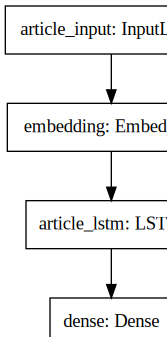

In [ ]:
# Add sequential model
fnc_model = Sequential()


# Add embedding layer 
#Input length = 20 sentenses * 20 words / sentense = 400
#No of output dimenstions is 100 as we embedded with GloVe 100d
Embed_Layer = Embedding(vocab_size, 100, weights=[embedding_matrix], input_length=(MAX_SEQUENCE_LENGTH,), trainable=True)
#Embed_Layer_head = Embedding(vocab_size, 100,weights=[embedding_matrix], input_length=(20,), trainable=False )

#define Inputs
article_input = Input(shape=(MAX_SEQUENCE_LENGTH,),dtype= 'int32',name = 'article_input')
#heading_input = Input(shape=(MAX_LEN,),dtype= 'int32',name = 'heading_input')

#head_embedding = Embed_Layer(heading_input)

article_embedding = Embed_Layer(article_input)


#LSTM for article and head
#Embedding dimension is 100
article_lstm = LSTM(100, dropout=0.2,name='article_lstm',return_state=False)(article_embedding)

#encoded_states =[state_h,state_c,x,y]
#head_lstm1 = LSTM(100,dropout=0.2,name='head_lstm1',return_state=False)(head_embedding)
#head1 = LSTM(100,dropout=0.2,name='head1',return_state=True)
#Concatenate the lstm outputs
#concat = keras.layers.concatenate([article_lstm,head_lstm1])

output_size = 2
#Add a dense layer over concatinated layer
#article_d = Dense(100,activation='relu')(article_lstm)
#head_d = Dense(100,activation='relu')(head_lstm1)


#concat = keras.layers.concatenate(article_d, head_d)
dense1 = Dense(100,activation='relu')(article_lstm)
predict = Dense(2,activation='softmax')(dense1)

fnc_model = Model(inputs=[article_input],outputs=[predict])
fnc_model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['acc'])

print(fnc_model.summary())



SVG(model_to_dot(fnc_model).create(prog='dot', format='svg'))

In [ ]:
fnc_model.fit(X_train,y_train,epochs= 5,batch_size=32,verbose=True,validation_data=(X_test,y_test))

Epoch 1/5
174/174 [==============================] - 79s 452ms/step - loss: 0.5224 - acc: 0.7428 - val_loss: 0.4614 - val_acc: 0.7947
Epoch 2/5
174/174 [==============================] - 82s 474ms/step - loss: 0.3519 - acc: 0.8562 - val_loss: 0.3259 - val_acc: 0.8559
Epoch 3/5
174/174 [==============================] - 83s 475ms/step - loss: 0.2526 - acc: 0.9030 - val_loss: 0.2995 - val_acc: 0.8624
Epoch 4/5
174/174 [==============================] - 83s 478ms/step - loss: 0.1812 - acc: 0.9339 - val_loss: 0.2926 - val_acc: 0.8696
Epoch 5/5
174/174 [==============================] - 82s 472ms/step - loss: 0.1295 - acc: 0.9524 - val_loss: 0.3349 - val_acc: 0.8646


Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
article_input (InputLayer)   [(None, 500)]             0         
_________________________________________________________________
embedding (Embedding)        (None, 500, 100)          2293600   
_________________________________________________________________
bidirectional (Bidirectional (None, 200)               160800    
_________________________________________________________________
dense (Dense)                (None, 100)               20100     
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 202       
Total params: 2,474,702
Trainable params: 2,474,702
Non-trainable params: 0
_________________________________________________________________
None


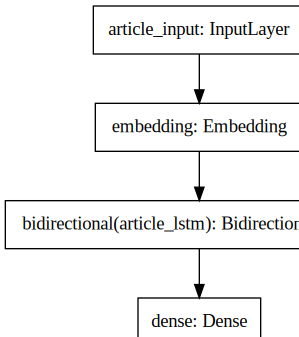

In [ ]:
# Add sequential model
BiD_model = Sequential()


# Add embedding layer 
#Input length = 20 sentenses * 20 words / sentense = 400
#No of output dimenstions is 100 as we embedded with GloVe 100d
Embed_Layer = Embedding(vocab_size, 100, weights=[embedding_matrix], input_length=(MAX_SEQUENCE_LENGTH,), trainable=True)
#Embed_Layer_head = Embedding(vocab_size, 100,weights=[embedding_matrix], input_length=(20,), trainable=False )

#define Inputs
article_input = Input(shape=(MAX_SEQUENCE_LENGTH,),dtype= 'int32',name = 'article_input')
#heading_input = Input(shape=(MAX_LEN,),dtype= 'int32',name = 'heading_input')

#head_embedding = Embed_Layer(heading_input)

article_embedding = Embed_Layer(article_input)


#LSTM for article and head
#Embedding dimension is 100
article_lstm = Bidirectional(LSTM(100, dropout=0.2,name='article_lstm',return_state=False))(article_embedding)

#encoded_states =[state_h,state_c,x,y]
#head_lstm1 = LSTM(100,dropout=0.2,name='head_lstm1',return_state=False)(head_embedding)
#head1 = LSTM(100,dropout=0.2,name='head1',return_state=True)
#Concatenate the lstm outputs
#concat = keras.layers.concatenate([article_lstm,head_lstm1])

output_size = 2
#Add a dense layer over concatinated layer
#article_d = Dense(100,activation='relu')(article_lstm)
#head_d = Dense(100,activation='relu')(head_lstm1)


#concat = keras.layers.concatenate(article_d, head_d)
dense1 = Dense(100,activation='relu')(article_lstm)
predict = Dense(2,activation='softmax')(dense1)

BiD_model = Model(inputs=[article_input],outputs=[predict])
BiD_model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['acc'])

print(BiD_model.summary())



SVG(model_to_dot(BiD_model).create(prog='dot', format='svg'))

In [ ]:
BiD_model.fit(X_train,y_train,epochs= 5,batch_size=32,verbose=True,validation_data=(X_test,y_test))

Epoch 1/5
174/174 [==============================] - 149s 857ms/step - loss: 0.5114 - acc: 0.7511 - val_loss: 0.4489 - val_acc: 0.8156
Epoch 2/5
174/174 [==============================] - 149s 853ms/step - loss: 0.3421 - acc: 0.8578 - val_loss: 0.3160 - val_acc: 0.8631
Epoch 3/5
174/174 [==============================] - 148s 849ms/step - loss: 0.2479 - acc: 0.9003 - val_loss: 0.2777 - val_acc: 0.8854
Epoch 4/5
174/174 [==============================] - 148s 852ms/step - loss: 0.1808 - acc: 0.9279 - val_loss: 0.2912 - val_acc: 0.8797
Epoch 5/5
174/174 [==============================] - 149s 856ms/step - loss: 0.1141 - acc: 0.9605 - val_loss: 0.3972 - val_acc: 0.8710


In [ ]:
import os
import pandas as pd
#Load train bodies
val_path = os.path.join(project_path,'valid.tsv')
print(val_path)
df2 = pd.read_csv(val_path,sep='\t')
#print(val_text.head)
#print(train_text.head)
df2.columns = ['Id','Text','Label']
#df2 = val_text
print(df2)
val_texts = []


/content/drive/My Drive/DLCP/NLP/covid tweet/valid.tsv
                      Id  ...          Label
0    1235713405992030209  ...    INFORMATIVE
1    1245941302367305728  ...  UNINFORMATIVE
2    1245913002840391681  ...  UNINFORMATIVE
3    1240543259299987457  ...  UNINFORMATIVE
4    1244613970142662662  ...    INFORMATIVE
..                   ...  ...            ...
994  1245955124222099456  ...  UNINFORMATIVE
995  1241768801210904576  ...    INFORMATIVE
996  1241172153040502795  ...  UNINFORMATIVE
997  1239740620194766848  ...  UNINFORMATIVE
998  1236131066596986882  ...    INFORMATIVE

[999 rows x 3 columns]


In [ ]:
df2.Text = df2.Text.str.lower()
# Removing http tags
df2.Text = df2.Text.str.replace(r'http(\S)+', r'')
df2.Text = df2.Text.str.replace(r'http ...', r'')

df2.Text = df2.Text.str.replace(r'(RT|rt)[ ]*@[ ]*[\S]+',r'')
df2.Text = df2.Text.str.replace(r'#\S\w*',r'')
df2.Text[df2.Text.str.contains(r'RT[ ]?@')]
df2.Text = df2.Text.str.replace(r'@[\S]+',r'')

dft2 = df2["Text"]
count = dft2.count()
val_texts = []
for i in range (0,count):
  val_texts.append(dft2[i])

In [ ]:
y_val = le.fit_transform(df2.Label)
y_val1 = to_categorical(np.asarray(y_val))

In [ ]:
tokenizer = Tokenizer(nb_words=MAX_NB_WORDS)
tokenizer.fit_on_texts(val_texts)
sequences = tokenizer.texts_to_sequences(val_texts)

valid_data = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH)

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/text.py:180: UserWarning: The `nb_words` argument in `Tokenizer` has been renamed `num_words`.
  warnings.warn('The `nb_words` argument in `Tokenizer` '


In [ ]:
print(valid_data.shape)

(999, 500)


In [ ]:
fnc_model.evaluate(
  valid_data,
  y_val1
)

32/32 [==============================] - 3s 83ms/step - loss: 1.1756 - acc: 0.5786


[1.175574541091919, 0.5785785913467407]

In [ ]:
Embedded_val = Embed_Layer(valid_data)
print(Embedded_val.shape)

(999, 500, 100)


In [ ]:
# Predict on the first 5 test messages.
predictions = fnc_model.predict(valid_data[:5])

# Print our model's predictions.
print(np.argmax(predictions, axis=1)) 

# Check our predictions against the ground truths.
print(y_val[:5]) 

[0 1 1 0 1]
[0 1 1 1 0]


In [ ]:
print(val_texts[5])

cw | coronavirus i can’t see my dad for a week because he’s been in contact with someone who’s son is suspect to have covid-19 and we can’t take any chances of me contracting it because it would kill me but i’m so sad i just wanna hug my dad :(


In [ ]:
print(model_cV.summary())